In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.inspection import permutation_importance

In [2]:
df = pd.read_csv("../data/Tetuan.csv")
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [3]:
df_original = df
df_original = df_original.drop(['DateTime'],axis=1)

In [4]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
df.isna().sum().sum() # There is NO Null Values

0

In [7]:
df['DateTime'] = pd.to_datetime(df['DateTime']) 

In [8]:
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Day of Week'] = df['DateTime'].dt.dayofweek + 1

In [9]:
def month_to_quarter(series):
    if series['Month'] <=3:
        return 1
    elif series['Month'] >3 and series['Month'] <=6:
        return 2
    elif series['Month'] >6 and series['Month'] <=9:
        return 3
    elif series['Month'] >9 and series['Month'] <=12:
        return 4

In [10]:
df['Quarter of Year'] = df.apply(month_to_quarter, axis='columns')

In [11]:
df['Day of Year'] = df['DateTime'].dt.strftime('%j').astype(int)  

In [12]:
df = df.drop(['DateTime'],axis=1)

In [13]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'Day',
       'Month', 'Hour', 'Minute', 'Day of Week', 'Quarter of Year',
       'Day of Year'],
      dtype='object')

In [14]:
df = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Day',
       'Month', 'Hour', 'Minute', 'Day of Week', 'Quarter of Year',
       'Day of Year','Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]

In [15]:
df.to_csv('../data/Tetuan_modified.csv',index=False)

## Exploratory data Analysis

In [16]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Day,Month,Hour,Minute,Day of Week,Quarter of Year,Day of Year,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,6.559,73.8,0.083,0.051,0.119,1,1,0,0,7,1,1,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,1,1,0,10,7,1,1,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,1,1,0,20,7,1,1,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,1,1,0,30,7,1,1,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,1,1,0,40,7,1,1,27335.69620,17872.34043,18442.40964


C:\Users\rawat\AppData\Local\Temp\ipykernel_10084\366200923.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

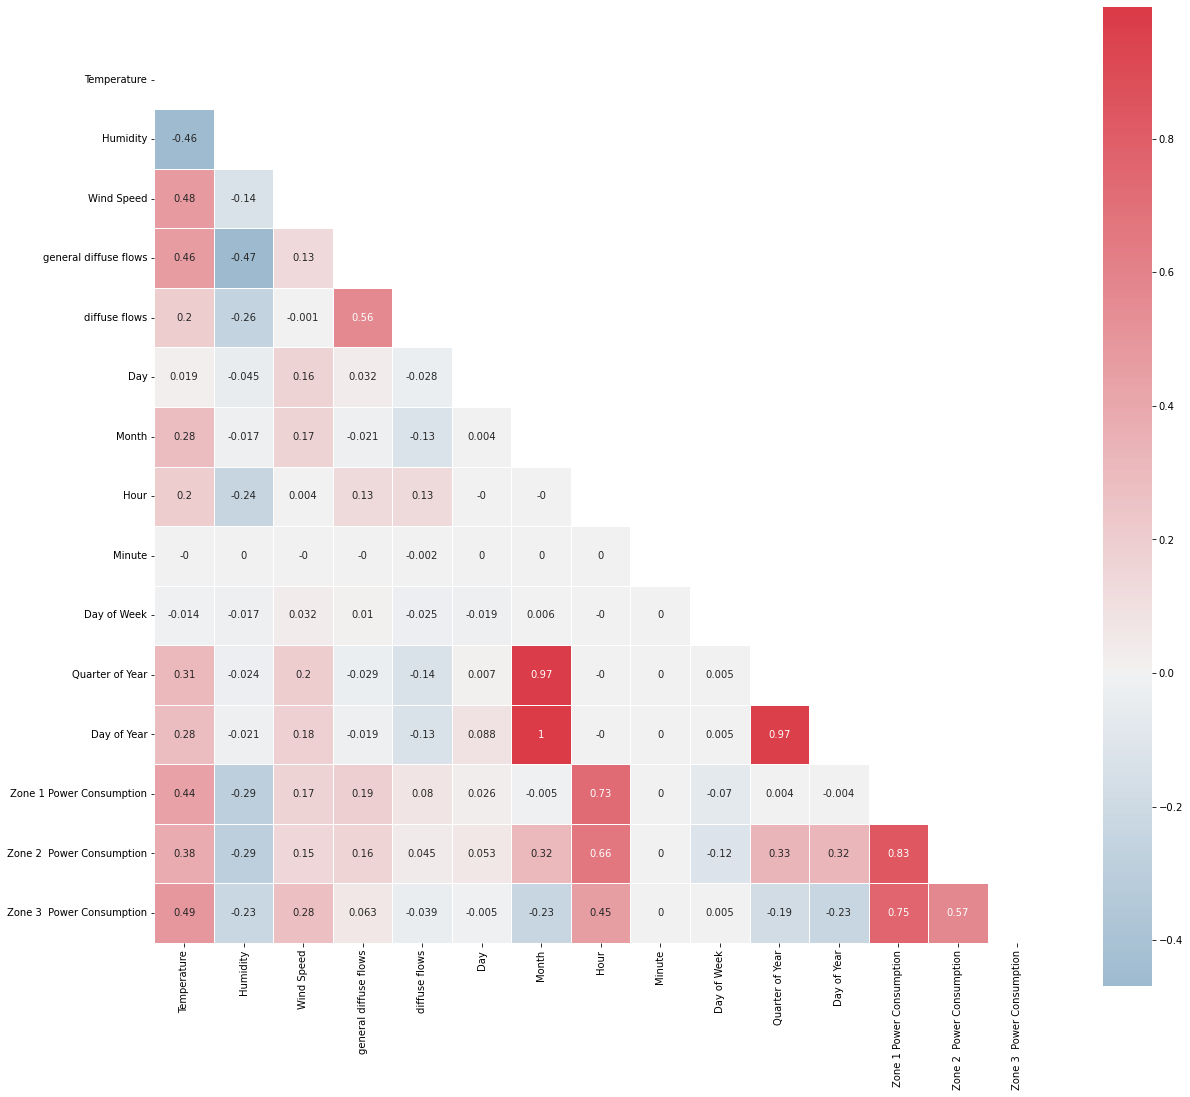

In [17]:
# Preprocessed Dataset
corr = df.corr().round(decimals=3)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

C:\Users\rawat\AppData\Local\Temp\ipykernel_10084\291812347.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

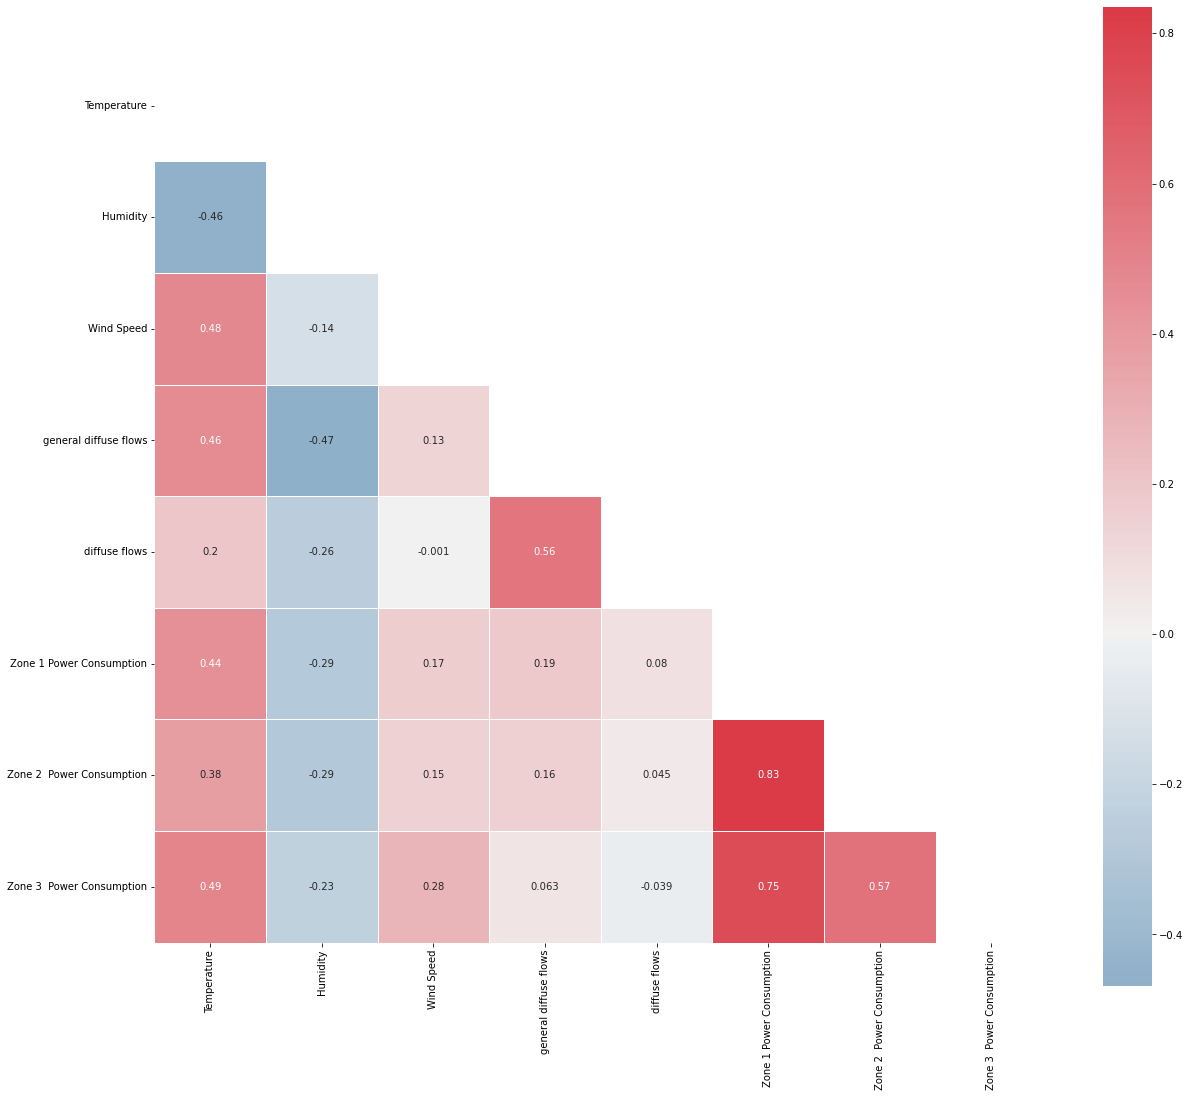

In [18]:
# Original Dataset
corr = df_original.corr().round(decimals=3)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [19]:
y= df[['Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]

X = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Day',
       'Month', 'Hour', 'Minute', 'Day of Week', 'Quarter of Year',
       'Day of Year']]

In [20]:
# load and summarize the dataset
# Using Zone-1 as target for feature selection because it has highest corr to other panels 

# from sklearn.model_selection import train_test_split
# # split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

## Feature Selection

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import time

In [22]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression

bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y['Zone 1 Power Consumption'])
pd.DataFrame({'Column':X.columns,'Score':fit.scores_})

,Column,Score
0,Temperature,12599.188076
1,Humidity,4719.862820
2,Wind Speed,1511.949826
3,general diffuse flows,1919.645156
4,diffuse flows,339.941108
5,Day,36.205083
6,Month,1.498047
7,Hour,59084.947978
8,Minute,0.006156
9,Day of Week,255.934980


Elapsed time to compute the importances: 144.883 seconds


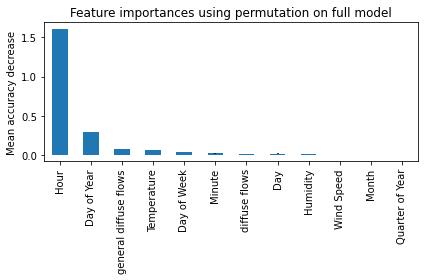

In [23]:
# Feature importance based on feature permutation

start_time = time.time()
forest = rf()
forest.fit(X,y['Zone 1 Power Consumption'])
result = permutation_importance(
    forest, X, y['Zone 1 Power Consumption'], n_repeats=10, random_state=42, n_jobs=1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X.columns)
forest_importances.sort_values(ascending=False,inplace=True)
forest_importances.to_csv('../results/important_features.csv')

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [24]:
forest_importances

Hour                     1.609949
Day of Year              0.291042
general diffuse flows    0.074083
Temperature              0.061040
Day of Week              0.040100
Minute                   0.018257
diffuse flows            0.017895
Day                      0.014887
Humidity                 0.008767
Wind Speed               0.003703
Month                    0.003007
Quarter of Year          0.000796
dtype: float64

In [25]:
# Based on Feature Selection only following features would be used 
X = X[['Hour','Day of Year','general diffuse flows','Temperature','Day of Week','Minute','diffuse flows','Day']]

In [26]:
y.columns

Index(['Zone 1 Power Consumption', 'Zone 2  Power Consumption',
       'Zone 3  Power Consumption'],
      dtype='object')

## Model 

### Decision Tree

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy

In [28]:
from math import sqrt

def calcuate_model_performance(scores,model_name):
    rmse = np.sqrt(-1*scores['test_neg_mean_squared_error'])
    mse = (-1*scores['test_neg_mean_squared_error'])
    mae = (-1*scores['test_neg_mean_absolute_error'])
    r2 = scores['test_r2']
    
    
    result = pd.DataFrame({'Model':[model_name,model_name],'Metric': ['Mean','Std.'] ,'MAE': [mae.mean(),mae.std()] , 'MSE': [mse.mean(),mse.std()]
                  , 'RMSE': [rmse.mean(),rmse.std()], 'R2':[r2.mean(),r2.std()],'Fit Time': [scores['fit_time'].mean(),scores['fit_time'].std()] ,'Inference Time':[scores['score_time'].mean(),scores['score_time'].std()] })
    return result

In [28]:
# param_grid = { 
#     'max_depth' : [4,5,6,7,8]
# }
# dc = DecisionTreeRegressor()
# CV_dc = GridSearchCV(estimator=dc, param_grid=param_grid, cv= 10)
# CV_dc.fit(X,y['Zone 1 Power Consumption'])
# CV_dc.best_estimator_

In [29]:
scores = cross_validate(dc,X,y['Zone 1 Power Consumption'],cv=10,scoring=['neg_mean_absolute_error','neg_mean_squared_error','r2'])

NameError: name 'dc' is not defined

In [ ]:
scores

In [30]:
df_res = pd.DataFrame({'Zone':[],'Model':[],'Metric': [] ,'MAE': [] , 'MSE': []
                  , 'RMSE': [], 'R2':[],'Fit Time': [] ,'Inference Time':[] })

dc = DecisionTreeRegressor(max_depth=7)
for zone in ['Zone 1 Power Consumption','Zone 2  Power Consumption', 'Zone 3  Power Consumption']:
    scores = cross_validate(dc,X,y[zone]/1000,cv=10,scoring=['neg_mean_absolute_error','neg_mean_squared_error','r2'])
    res = calcuate_model_performance(scores,'Decision Tree')
    res['Zone'] = zone[:6]
    df_res = df_res.append(res)
    
df_res
    

C:\Users\rawat\AppData\Local\Temp\ipykernel_1580\3301041893.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(res)
C:\Users\rawat\AppData\Local\Temp\ipykernel_1580\3301041893.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(res)
C:\Users\rawat\AppData\Local\Temp\ipykernel_1580\3301041893.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(res)


,Zone,Model,Metric,MAE,MSE,RMSE,R2,Fit Time,Inference Time
0,Zone 1,Decision Tree,Mean,2.118288,8.923180,2.800877,0.808731,0.121566,0.002901
1,Zone 1,Decision Tree,Std.,0.784211,6.835771,1.038398,0.132657,0.004580,0.000300
0,Zone 2,Decision Tree,Mean,1.816098,5.798221,2.340872,0.729316,0.122608,0.002900
1,Zone 2,Decision Tree,Std.,0.479081,3.000879,0.564394,0.128803,0.004566,0.000539
0,Zone 3,Decision Tree,Mean,1.966630,8.202564,2.592601,0.672949,0.122509,0.002500
1,Zone 3,Decision Tree,Std.,0.944553,7.387193,1.216956,0.166765,0.003107,0.000500


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y['Zone 1 Power Consumption']/1000, test_size=0.70, random_state=1)
dc = DecisionTreeRegressor(max_depth = 7)
dc.fit(X_train, y_train)

y_pred_train = dc.predict(X_train)
y_pred_test = dc.predict(X_test)

dc_train = pd.DataFrame({'Predicted Power Consumption (kW)': y_pred_train,'Actual Power Consumption (kW)':y_train })
dc_test = pd.DataFrame({'Predicted Power Consumption (kW)': y_pred_test,'Actual Power Consumption (kW)':y_test })

dc_test.to_csv('../results/decisionTree_test.csv')

In [52]:
def generate_plot(df,title):
    sns.regplot(x="Actual Power Consumption (kW)",
                y="Predicted Power Consumption (kW)", 
                scatter_kws = {'s':20,'alpha':0.3,'color':'#5588ff'}, ci=False,
                data=dc_train)

    slope, intercept, r_value, p_value, std_err = stats.linregress(df["Actual Power Consumption (kW)"],df["Predicted Power Consumption (kW)"])
    
    plt.annotate('$R^2$:{}'.format(round(r_value**2,3)),(15, 45) )

    plt.title(title) 

Text(0.5, 1.0, 'Testing Data')

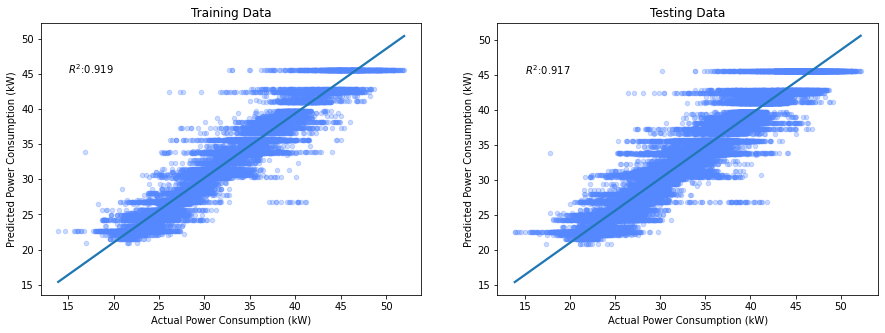

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

sns.regplot(x="Actual Power Consumption (kW)",
        y="Predicted Power Consumption (kW)", 
        scatter_kws = {'s':20,'alpha':0.3,'color':'#5588ff'},
        data=dc_train,ax=ax1).set(title='Training Data')

slope, intercept, r_value, p_value, std_err = stats.linregress(dc_train["Actual Power Consumption (kW)"],dc_train["Predicted Power Consumption (kW)"])

ax1.annotate('$R^2$:{}'.format(round(r_value**2,3)),(15, 45) )


sns.regplot(x="Actual Power Consumption (kW)",
            y="Predicted Power Consumption (kW)", 
            scatter_kws = {'s':20,'alpha':0.3,'color':'#5588ff'},
            data=dc_test,ax=ax2)

slope, intercept, r_value, p_value, std_err = stats.linregress(dc_test["Actual Power Consumption (kW)"],dc_test["Predicted Power Consumption (kW)"])

corr = scipy.stats.pearsonr(dc_test["Actual Power Consumption (kW)"],dc_test["Predicted Power Consumption (kW)"])[0]

plt.annotate('$R^2$:{}'.format(round(r_value**2,3)),(15, 45) )

plt.title('Testing Data')

# Zone 2

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y['Zone 2  Power Consumption']/1000, test_size=0.70, random_state=1)
dc = DecisionTreeRegressor(max_depth = 7)
dc.fit(X_train, y_train)

y_pred_train = dc.predict(X_train)
y_pred_test = dc.predict(X_test)

dc_train = pd.DataFrame({'Predicted Power Consumption (kW)': y_pred_train,'Actual Power Consumption (kW)':y_train })
dc_test = pd.DataFrame({'Predicted Power Consumption (kW)': y_pred_test,'Actual Power Consumption (kW)':y_test })


Text(0.5, 1.0, 'Testing Data')

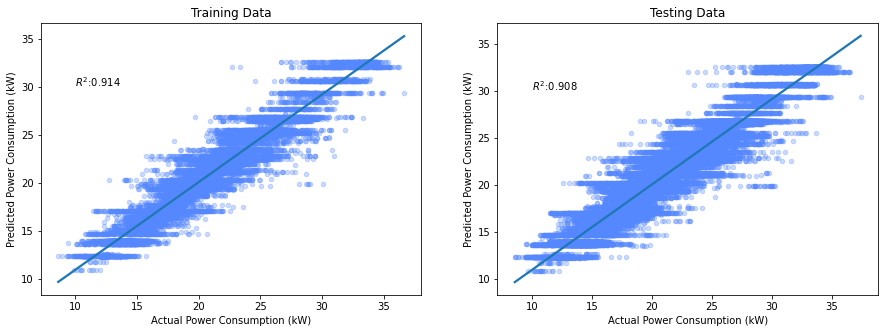

In [59]:
fig, (ax3, ax4) = plt.subplots(ncols=2, figsize=(15,5))

sns.regplot(x="Actual Power Consumption (kW)",
        y="Predicted Power Consumption (kW)", 
        scatter_kws = {'s':20,'alpha':0.3,'color':'#5588ff'},
        data=dc_train,ax=ax3).set(title='Training Data')

slope, intercept, r_value, p_value, std_err = stats.linregress(dc_train["Actual Power Consumption (kW)"],dc_train["Predicted Power Consumption (kW)"])

ax3.annotate('$R^2$:{}'.format(round(r_value**2,3)),(10, 30) )


sns.regplot(x="Actual Power Consumption (kW)",
            y="Predicted Power Consumption (kW)", 
            scatter_kws = {'s':20,'alpha':0.3,'color':'#5588ff'},
            data=dc_test,ax=ax4)

slope, intercept, r_value, p_value, std_err = stats.linregress(dc_test["Actual Power Consumption (kW)"],dc_test["Predicted Power Consumption (kW)"])

corr = scipy.stats.pearsonr(dc_test["Actual Power Consumption (kW)"],dc_test["Predicted Power Consumption (kW)"])[0]

plt.annotate('$R^2$:{}'.format(round(r_value**2,3)),(10, 30) )

plt.title('Testing Data')

## Zone 3

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y['Zone 3  Power Consumption']/1000, test_size=0.70, random_state=1)
dc = DecisionTreeRegressor(max_depth = 7)
dc.fit(X_train, y_train)

y_pred_train = dc.predict(X_train)
y_pred_test = dc.predict(X_test)

dc_train = pd.DataFrame({'Predicted Power Consumption (kW)': y_pred_train,'Actual Power Consumption (kW)':y_train })
dc_test = pd.DataFrame({'Predicted Power Consumption (kW)': y_pred_test,'Actual Power Consumption (kW)':y_test })


Text(0.5, 1.0, 'Testing Data')

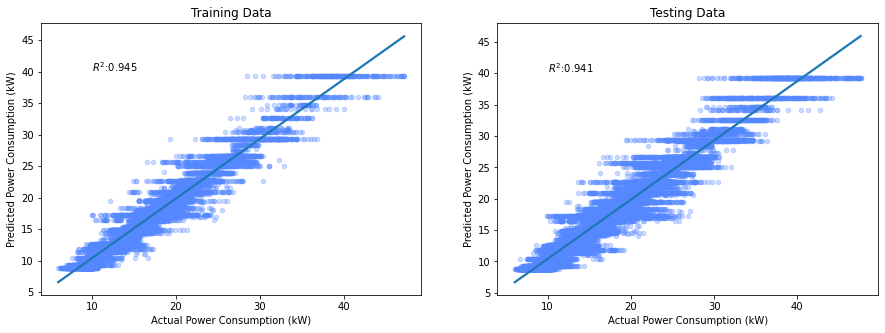

In [62]:
fig, (ax3, ax4) = plt.subplots(ncols=2, figsize=(15,5))

sns.regplot(x="Actual Power Consumption (kW)",
        y="Predicted Power Consumption (kW)", 
        scatter_kws = {'s':20,'alpha':0.3,'color':'#5588ff'},
        data=dc_train,ax=ax3).set(title='Training Data')

slope, intercept, r_value, p_value, std_err = stats.linregress(dc_train["Actual Power Consumption (kW)"],dc_train["Predicted Power Consumption (kW)"])

ax3.annotate('$R^2$:{}'.format(round(r_value**2,3)),(10, 40) )


sns.regplot(x="Actual Power Consumption (kW)",
            y="Predicted Power Consumption (kW)", 
            scatter_kws = {'s':20,'alpha':0.3,'color':'#5588ff'},
            data=dc_test,ax=ax4)

slope, intercept, r_value, p_value, std_err = stats.linregress(dc_test["Actual Power Consumption (kW)"],dc_test["Predicted Power Consumption (kW)"])

corr = scipy.stats.pearsonr(dc_test["Actual Power Consumption (kW)"],dc_test["Predicted Power Consumption (kW)"])[0]

plt.annotate('$R^2$:{}'.format(round(r_value**2,3)),(10, 40) )

plt.title('Testing Data')

## Random Forest ( Bagging )

In [34]:
# param_grid = { 
#     'n_estimators': [ 500,1000],
#     'max_depth' : [8,9,10]
# }
# rf = rf()
# CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
# CV_rf.fit(X,y['Zone 1 Power Consumption'])
# CV_rf.best_estimator_


In [35]:

Rf = rf(n_estimators= 599 , max_depth = 8)

for zone in ['Zone 1 Power Consumption','Zone 2  Power Consumption', 'Zone 3  Power Consumption']:
    scores = cross_validate(Rf,X,y[zone]/1000,cv=10,scoring=['neg_mean_absolute_error','neg_mean_squared_error','r2'])
    res = calcuate_model_performance(scores,'Random Forest')
    res['Zone'] = zone[:6]
    df_res = df_res.append(res)
    
df_res



C:\Users\rawat\AppData\Local\Temp\ipykernel_1580\2366330298.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(res)
C:\Users\rawat\AppData\Local\Temp\ipykernel_1580\2366330298.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(res)
C:\Users\rawat\AppData\Local\Temp\ipykernel_1580\2366330298.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(res)


,Zone,Model,Metric,MAE,MSE,RMSE,R2,Fit Time,Inference Time
0,Zone 1,Decision Tree,Mean,2.118288,8.923180,2.800877,0.808731,0.121566,0.002901
1,Zone 1,Decision Tree,Std.,0.784211,6.835771,1.038398,0.132657,0.004580,0.000300
0,Zone 2,Decision Tree,Mean,1.816098,5.798221,2.340872,0.729316,0.122608,0.002900
1,Zone 2,Decision Tree,Std.,0.479081,3.000879,0.564394,0.128803,0.004566,0.000539
0,Zone 3,Decision Tree,Mean,1.966630,8.202564,2.592601,0.672949,0.122509,0.002500
1,Zone 3,Decision Tree,Std.,0.944553,7.387193,1.216956,0.166765,0.003107,0.000500
0,Zone 1,Random Forest,Mean,1.983292,8.330982,2.676757,0.823379,49.848892,0.136800
1,Zone 1,Random Forest,Std.,0.771656,6.968799,1.079792,0.132759,0.296592,0.004660
0,Zone 2,Random Forest,Mean,1.549324,4.332401,2.020899,0.794483,49.768678,0.135400
1,Zone 2,Random Forest,Std.,0.415929,2.096921,0.498365,0.110513,0.481519,0.003876


In [36]:
Rf = rf(n_estimators= 1000 , max_depth = 10)
Rf.fit(X_train, y_train)

y_pred_train = Rf.predict(X_train)
y_pred_test = Rf.predict(X_test)

rf_train = pd.DataFrame({'Predicted Power Consumption (kW)': y_pred_train,'Actual Power Consumption (kW)':y_train })
rf_test = pd.DataFrame({'Predicted Power Consumption (kW)': y_pred_test,'Actual Power Consumption (kW)':y_test })


Text(0.5, 1.0, 'Training Data')

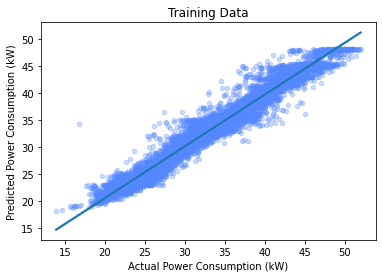

In [37]:
sns.regplot(x="Actual Power Consumption (kW)",
            y="Predicted Power Consumption (kW)", 
            scatter_kws = {'s':20,'alpha':0.3,'color':'#5588ff'},

            data=rf_train)

plt.title('Training Data')

Text(0.5, 1.0, 'Testing Data')

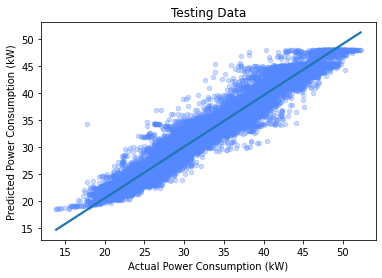

In [38]:
sns.regplot(x="Actual Power Consumption (kW)",
            y="Predicted Power Consumption (kW)", 
            scatter_kws = {'s':20,'alpha':0.3,'color':'#5588ff'},
            data=rf_test)
plt.title('Testing Data')

# Boosting

## Adaboost

In [41]:
from sklearn.ensemble import AdaBoostRegressor  

# param_grid = { 
#     'n_estimators': [10,100,200, 500]
# }
# abr = AdaBoostRegressor()
# CV_abr = GridSearchCV(estimator=abr, param_grid=param_grid, cv= 10)
# CV_abr.fit(X,y['Zone 1 Power Consumption'])
# CV_abr.best_estimator_


In [42]:

ABR = AdaBoostRegressor(n_estimators=  10)

for zone in ['Zone 1 Power Consumption','Zone 2  Power Consumption', 'Zone 3  Power Consumption']:
    scores = cross_validate(ABR,X,y[zone]/1000,cv=10,scoring=['neg_mean_absolute_error','neg_mean_squared_error','r2'])
    res = calcuate_model_performance(scores,'AdaBoost')
    res['Zone'] = zone[:6]
    df_res = df_res.append(res)
    
df_res



C:\Users\rawat\AppData\Local\Temp\ipykernel_1580\3158026535.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(res)
C:\Users\rawat\AppData\Local\Temp\ipykernel_1580\3158026535.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(res)
C:\Users\rawat\AppData\Local\Temp\ipykernel_1580\3158026535.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(res)


,Zone,Model,Metric,MAE,MSE,RMSE,R2,Fit Time,Inference Time
0,Zone 1,Decision Tree,Mean,2.118288,8.923180,2.800877,0.808731,0.121566,0.002901
1,Zone 1,Decision Tree,Std.,0.784211,6.835771,1.038398,0.132657,0.004580,0.000300
0,Zone 2,Decision Tree,Mean,1.816098,5.798221,2.340872,0.729316,0.122608,0.002900
1,Zone 2,Decision Tree,Std.,0.479081,3.000879,0.564394,0.128803,0.004566,0.000539
0,Zone 3,Decision Tree,Mean,1.966630,8.202564,2.592601,0.672949,0.122509,0.002500
1,Zone 3,Decision Tree,Std.,0.944553,7.387193,1.216956,0.166765,0.003107,0.000500
0,Zone 1,Random Forest,Mean,1.983292,8.330982,2.676757,0.823379,49.848892,0.136800
1,Zone 1,Random Forest,Std.,0.771656,6.968799,1.079792,0.132759,0.296592,0.004660
0,Zone 2,Random Forest,Mean,1.549324,4.332401,2.020899,0.794483,49.768678,0.135400
1,Zone 2,Random Forest,Std.,0.415929,2.096921,0.498365,0.110513,0.481519,0.003876


In [43]:
ABR = AdaBoostRegressor(n_estimators= 10 )
ABR.fit(X_train, y_train)

y_pred_train = ABR.predict(X_train)
y_pred_test = ABR.predict(X_test)

abr_train = pd.DataFrame({'Predicted Power Consumption (kW)': y_pred_train,'Actual Power Consumption (kW)':y_train })
abr_test = pd.DataFrame({'Predicted Power Consumption (kW)': y_pred_test,'Actual Power Consumption (kW)':y_test })


Text(0.5, 1.0, 'Training Data')

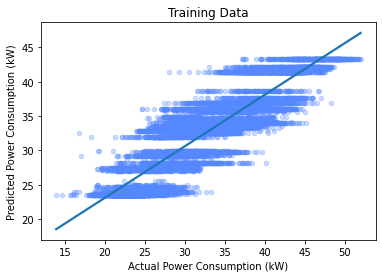

In [44]:
sns.regplot(x="Actual Power Consumption (kW)",
            y="Predicted Power Consumption (kW)", 
            scatter_kws = {'s':20,'alpha':0.3,'color':'#5588ff'},

            data=abr_train)

plt.title('Training Data')

Text(0.5, 1.0, 'Testing Data')

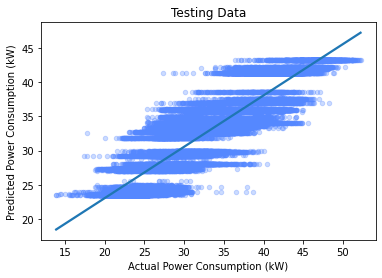

In [45]:
sns.regplot(x="Actual Power Consumption (kW)",
            y="Predicted Power Consumption (kW)", 
            scatter_kws = {'s':20,'alpha':0.3,'color':'#5588ff'},
            data=abr_test)
plt.title('Testing Data')

## Xgboost

In [52]:
from xgboost.sklearn import XGBRegressor

In [49]:
X.reset_index(drop=True,inplace=True)

In [53]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [300 , 500,700 , 1000 , 1500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(X,y['Zone 1 Power Consumption'])


Fitting 2 folds for each of 45 candidates, totalling 90 fits
[12:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[12:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [300, 500, 700, 1000, 1500],
                         'nthread': [4], 'objective': ['reg:linear'],
                         'silent': [1], 'subsample': [0.7]},
             verbose=True)

In [54]:
xgb_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=4,
             nthread=4, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, ...)

In [59]:
xgb1 = XGBRegressor(learning_rate=0.03,n_estimators=300,max_depth=7,n_jobs=4,min_child_weight= 4)

for zone in ['Zone 1 Power Consumption','Zone 2  Power Consumption', 'Zone 3  Power Consumption']:
    scores = cross_validate(xgb1,X,y[zone]/1000,cv=10,scoring=['neg_mean_absolute_error','neg_mean_squared_error','r2'])
    res = calcuate_model_performance(scores,'XgBoost')
    res['Zone'] = zone[:6]
    df_res = df_res.append(res)
    
df_res

C:\Users\rawat\AppData\Local\Temp\ipykernel_1580\1270610153.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(res)
C:\Users\rawat\AppData\Local\Temp\ipykernel_1580\1270610153.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(res)
C:\Users\rawat\AppData\Local\Temp\ipykernel_1580\1270610153.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(res)


,Zone,Model,Metric,MAE,MSE,RMSE,R2,Fit Time,Inference Time
0,Zone 1,Decision Tree,Mean,2.118288,8.923180,2.800877,0.808731,0.121566,0.002901
1,Zone 1,Decision Tree,Std.,0.784211,6.835771,1.038398,0.132657,0.004580,0.000300
0,Zone 2,Decision Tree,Mean,1.816098,5.798221,2.340872,0.729316,0.122608,0.002900
1,Zone 2,Decision Tree,Std.,0.479081,3.000879,0.564394,0.128803,0.004566,0.000539
0,Zone 3,Decision Tree,Mean,1.966630,8.202564,2.592601,0.672949,0.122509,0.002500
1,Zone 3,Decision Tree,Std.,0.944553,7.387193,1.216956,0.166765,0.003107,0.000500
0,Zone 1,Random Forest,Mean,1.983292,8.330982,2.676757,0.823379,49.848892,0.136800
1,Zone 1,Random Forest,Std.,0.771656,6.968799,1.079792,0.132759,0.296592,0.004660
0,Zone 2,Random Forest,Mean,1.549324,4.332401,2.020899,0.794483,49.768678,0.135400
1,Zone 2,Random Forest,Std.,0.415929,2.096921,0.498365,0.110513,0.481519,0.003876


In [60]:
xgb1 = XGBRegressor(learning_rate=0.03,n_estimators=300,max_depth=7,n_jobs=4,min_child_weight= 4)
xgb1.fit(X_train, y_train)

y_pred_train = xgb1.predict(X_train)
y_pred_test = xgb1.predict(X_test)

xgb_train = pd.DataFrame({'Predicted Power Consumption (kW)': y_pred_train,'Actual Power Consumption (kW)':y_train })
xgb_test = pd.DataFrame({'Predicted Power Consumption (kW)': y_pred_test,'Actual Power Consumption (kW)':y_test })


Text(0.5, 1.0, 'Training Data')

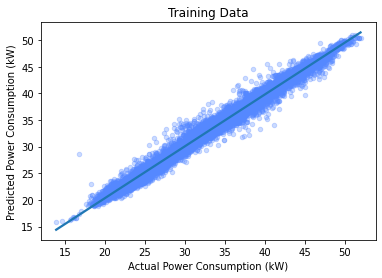

In [61]:
sns.regplot(x="Actual Power Consumption (kW)",
            y="Predicted Power Consumption (kW)", 
            scatter_kws = {'s':20,'alpha':0.3,'color':'#5588ff'},

            data=xgb_train)

plt.title('Training Data')

Text(0.5, 1.0, 'Testing Data')

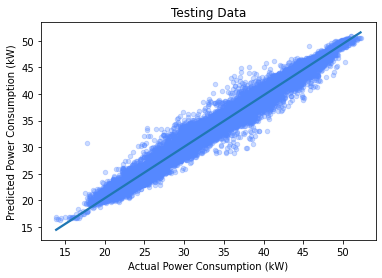

In [62]:
sns.regplot(x="Actual Power Consumption (kW)",
            y="Predicted Power Consumption (kW)", 
            scatter_kws = {'s':20,'alpha':0.3,'color':'#5588ff'},
            data=xgb_test)
plt.title('Testing Data')

In [66]:
df_res['Model'][-6:] = 'XgBoost'

C:\Users\rawat\AppData\Local\Temp\ipykernel_1580\3265832629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['Model'][-6:] = 'XgBoost'


In [68]:
df_res.to_csv('../results/combined_results.csv')